In [1]:
#Name-vipul Anand
#Task-Titanic survived project
#Batch-DS2312

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#checking the shape of the dataset
data.shape

(891, 12)

In [6]:
#checking the info of the dataset
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#checking the datatype of the individual columns
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#The value counts of the elements in the model
data.value_counts

<bound method DataFrame.value_counts of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                           

In [9]:
#The value counts of the elements of the label
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
#So the label data seems to be balanced 

<Axes: >

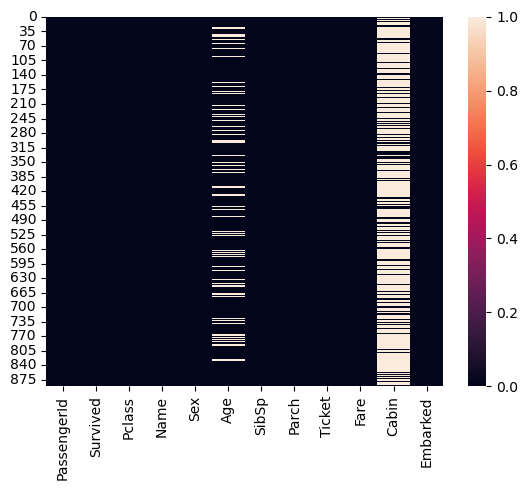

In [13]:
#Plotting the heatmap to get check the nulls
sns.heatmap(data.isna())
#so from the graph it is clear that there are nulls

In [14]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [89]:
#The name column has all different attributes and so it needs to be dropped and apart from that we have passengerid to
#uniquely identify each row in this columns so we can drop the name columns
data.drop(columns='Name',inplace=True)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [90]:
#The column Sex has categorical attributes but this is in alphabetical format so we must convert this to numerical form
data['Sex']=data['Sex'].replace({'male':1,'female':0})

In [21]:
data
#so we have converted Sex to numerical form

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,C


In [23]:
#After that we also have to convert Embarked to numerical form
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [91]:
data['Embarked']=data['Embarked'].replace({'S':0,'C':1,'Q':2})
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,1.0


In [25]:
#Succesfully we have also converted the Embarked to numerical form

In [29]:
#Now the ticket column  also has to be converted to numrical form
data['Ticket'].dtype

dtype('O')

In [92]:
data
#Passengerid is also not important for the model as it has all different values in it
data.drop(columns='PassengerId',inplace=True)

In [32]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,1,1,0,35.0,1,0,113803,53.1000,C123,0.0
4,0,3,1,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,NaN,0.0
887,1,1,0,19.0,0,0,112053,30.0000,B42,0.0
888,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,1,1,1,26.0,0,0,111369,30.0000,C148,1.0


In [33]:
data['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [35]:
#In this case we can see that we can not apply the encoders also so one thing i thought is to extact the numbers from these 
#ticket expressions and than modify the column using those numbers . we will extract the numbers using regex

In [93]:
#So let us first define a function to extract the numbers
import re
def extract_ticket_number(ticket):
    match=re.search(r'\d+\d+',ticket)
    if match:
        return float(match.group())
    else:
        return None

In [94]:
data['Ticket']=data['Ticket'].apply(extract_ticket_number)

In [98]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,21171.0,7.2500,NaN,0.0
1,1,1,0,38.0,1,0,17599.0,71.2833,C85,1.0
2,1,3,0,26.0,0,0,3101282.0,7.9250,NaN,0.0
3,1,1,0,35.0,1,0,113803.0,53.1000,C123,0.0
4,0,3,1,35.0,0,0,373450.0,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536.0,13.0000,NaN,0.0
887,1,1,0,19.0,0,0,112053.0,30.0000,B42,0.0
888,0,3,0,NaN,1,2,6607.0,23.4500,NaN,0.0
889,1,1,1,26.0,0,0,111369.0,30.0000,C148,1.0


In [96]:
#Now let us check the number of nulls in the data

In [97]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        6
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [101]:
#The cabin data has some c in it we need to remove c from it
data['Cabin']=data['Cabin'].str.replace('C','')
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,21171.0,7.2500,NaN,0.0
1,1,1,0,38.0,1,0,17599.0,71.2833,85,1.0
2,1,3,0,26.0,0,0,3101282.0,7.9250,NaN,0.0
3,1,1,0,35.0,1,0,113803.0,53.1000,123,0.0
4,0,3,1,35.0,0,0,373450.0,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536.0,13.0000,NaN,0.0
887,1,1,0,19.0,0,0,112053.0,30.0000,B42,0.0
888,0,3,0,NaN,1,2,6607.0,23.4500,NaN,0.0
889,1,1,1,26.0,0,0,111369.0,30.0000,148,1.0


In [102]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        6
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [103]:
#Now let us remove the nulls from the data using imputers

In [105]:
#At first the age
from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
knn_imp=knnimp.fit_transform(data[['Pclass','Age']])

In [109]:
data[['Pclass','Age']]=knn_imp

In [111]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3.0,1,22.000000,1,0,21171.0,7.2500,NaN,0.0
1,1,1.0,0,38.000000,1,0,17599.0,71.2833,85,1.0
2,1,3.0,0,26.000000,0,0,3101282.0,7.9250,NaN,0.0
3,1,1.0,0,35.000000,1,0,113803.0,53.1000,123,0.0
4,0,3.0,1,35.000000,0,0,373450.0,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2.0,1,27.000000,0,0,211536.0,13.0000,NaN,0.0
887,1,1.0,0,19.000000,0,0,112053.0,30.0000,B42,0.0
888,0,3.0,0,27.666667,1,2,6607.0,23.4500,NaN,0.0
889,1,1.0,1,26.000000,0,0,111369.0,30.0000,148,1.0


In [112]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        6
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [113]:
#Now we have to clean the Embarked
knn_imp=knnimp.fit_transform(data[['Sex','Embarked']])
data[['Sex','Embarked']]=knn_imp
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3.0,1.0,22.000000,1,0,21171.0,7.2500,NaN,0.0
1,1,1.0,0.0,38.000000,1,0,17599.0,71.2833,85,1.0
2,1,3.0,0.0,26.000000,0,0,3101282.0,7.9250,NaN,0.0
3,1,1.0,0.0,35.000000,1,0,113803.0,53.1000,123,0.0
4,0,3.0,1.0,35.000000,0,0,373450.0,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2.0,1.0,27.000000,0,0,211536.0,13.0000,NaN,0.0
887,1,1.0,0.0,19.000000,0,0,112053.0,30.0000,B42,0.0
888,0,3.0,0.0,27.666667,1,2,6607.0,23.4500,NaN,0.0
889,1,1.0,1.0,26.000000,0,0,111369.0,30.0000,148,1.0


In [114]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        6
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [122]:
#Now the cabin columns
#Since the cabin column has 687 nulls so it will be beneficial if we should drop this columns
data.drop(columns='Cabin',inplace=True)

In [123]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3.0,1.0,22.000000,1,0,21171.0,7.2500,0.0
1,1,1.0,0.0,38.000000,1,0,17599.0,71.2833,1.0
2,1,3.0,0.0,26.000000,0,0,3101282.0,7.9250,0.0
3,1,1.0,0.0,35.000000,1,0,113803.0,53.1000,0.0
4,0,3.0,1.0,35.000000,0,0,373450.0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2.0,1.0,27.000000,0,0,211536.0,13.0000,0.0
887,1,1.0,0.0,19.000000,0,0,112053.0,30.0000,0.0
888,0,3.0,0.0,27.666667,1,2,6607.0,23.4500,0.0
889,1,1.0,1.0,26.000000,0,0,111369.0,30.0000,1.0


In [124]:
#checking the datatypes of the columns
data.dtypes

Survived      int64
Pclass      float64
Sex         float64
Age         float64
SibSp         int64
Parch         int64
Ticket      float64
Fare        float64
Embarked    float64
dtype: object

In [125]:
#So all the columns are either float or int

In [126]:
#checking the value counts of all the columns
for columns in data:
    print(data[columns].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64
Sex
1.0    577
0.0    314
Name: count, dtype: int64
Age
27.666667    136
24.000000     30
42.333333     30
22.000000     27
18.000000     26
            ... 
14.500000      1
70.500000      1
12.000000      1
36.500000      1
74.000000      1
Name: count, Length: 91, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Ticket
1601.0       7
2343.0       7
347082.0     7
3101295.0    6
2144.0       6
            ..
9234.0       1
19988.0      1
2693.0       1
17612.0      1
370376.0     1
Name: count, Length: 677, dtype: int64
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
E

In [127]:
#checking the unique values in each of the column
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          91
SibSp         7
Parch         7
Ticket      677
Fare        248
Embarked      4
dtype: int64

In [128]:
#now let us see the statistical analysis of our data
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.850000e+02,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.875612,0.523008,0.381594,2.990026e+05,32.204208,0.362140
std,0.486592,0.836071,0.477990,13.241526,1.102743,0.806057,6.582046e+05,49.693429,0.635444
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,5.410000e+02,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.487900e+04,7.910400,0.000000
50%,0.000000,3.000000,1.000000,27.666667,0.000000,0.000000,1.123790e+05,14.454200,0.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,3.470820e+05,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,3.101317e+06,512.329200,2.000000


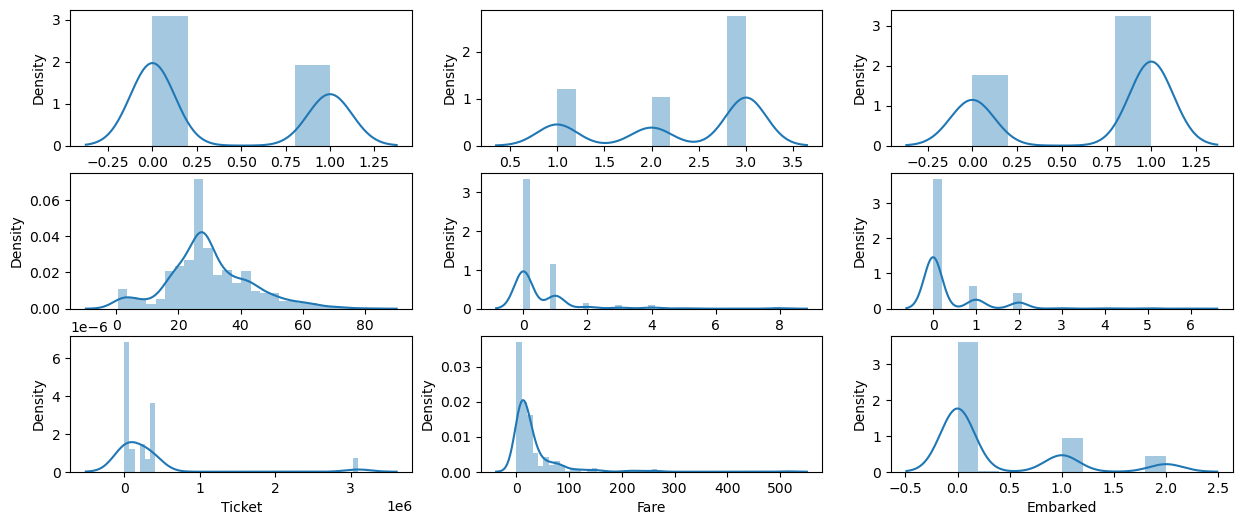

In [131]:
#et us see the distribution of each of the column from there we can get a clear picture
plt.figure(figsize=(15,6))
plotnumber=1
for column in data:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

In [132]:
#some of the columns seems to have outliers we must clean them as per needs

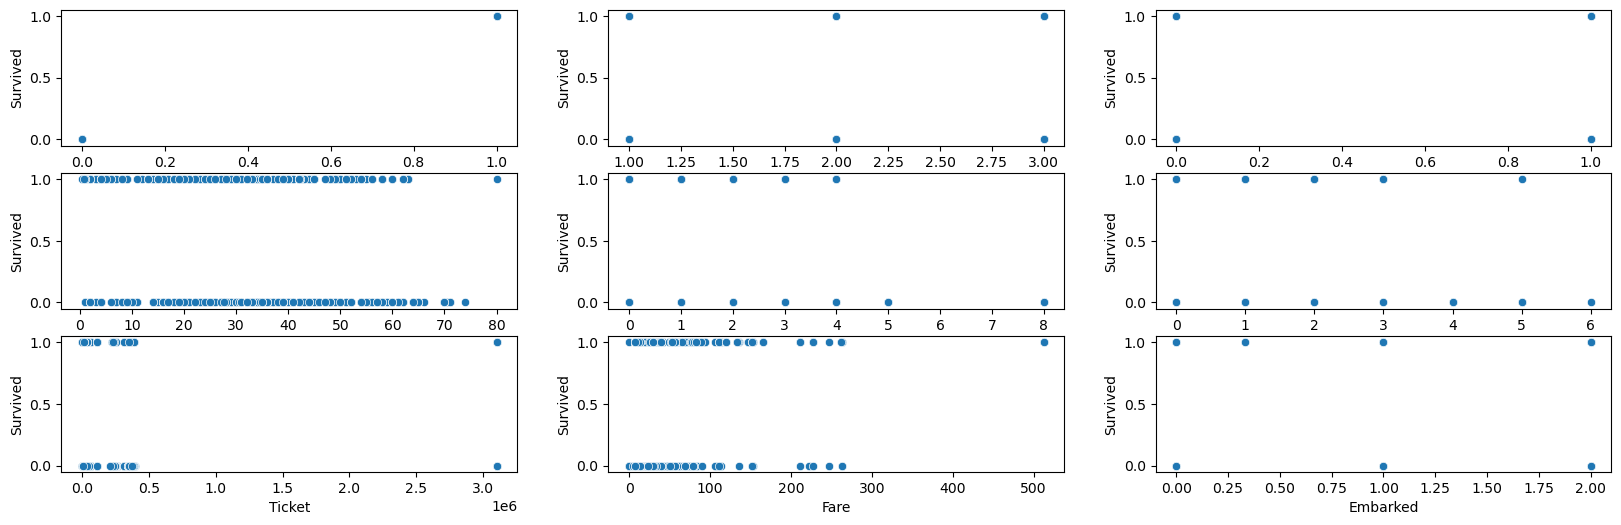

In [136]:
#now let us see the relation of the columns with the label
plt.figure(figsize=(20,6))
plotnumber=1
for column in data:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.scatterplot(x=column,y='Survived',data=data)
        plt.xlabel(column)
    plotnumber+=1

In [138]:
#let us plot thr boxplot see the residuals

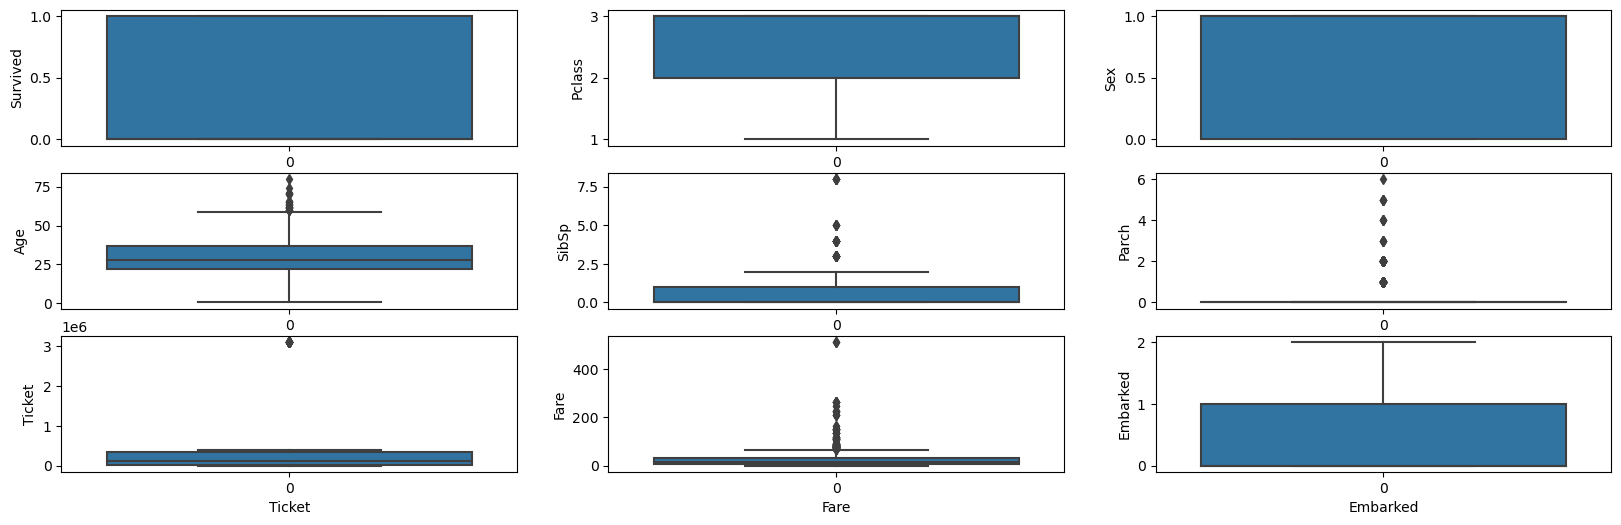

In [140]:
plt.figure(figsize=(20,6))
plotnumber=1
for column in data:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
        plt.ylabel(column)
    plotnumber+=1
plt.show()

In [142]:
#so our assumption was right there are residuals in the data

In [143]:
#let us divide the dataset in features and label to that we can treat the outliers in the features
x=data.drop(columns='Survived')
y=data['Survived']

In [144]:
#now let us remove the outliers using the z score 

In [145]:
from scipy.stats import zscore

In [146]:
a=np.abs(zscore(x))

In [147]:
#The Zscore
a

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.827377,0.737695,0.595100,0.432793,0.473674,NaN,0.502445,0.570221
1,1.566107,1.355574,0.613898,0.432793,0.473674,NaN,0.786845,1.004367
2,0.827377,1.355574,0.292851,0.474545,0.473674,NaN,0.488854,0.570221
3,1.566107,1.355574,0.387211,0.432793,0.473674,NaN,0.420730,0.570221
4,0.827377,0.737695,0.387211,0.474545,0.473674,NaN,0.486337,0.570221
...,...,...,...,...,...,...,...,...
886,0.369365,0.737695,0.217288,0.474545,0.473674,NaN,0.386671,0.570221
887,1.566107,1.355574,0.821787,0.474545,0.473674,NaN,0.044381,0.570221
888,0.827377,1.355574,0.166913,0.432793,2.008933,NaN,0.176263,0.570221
889,1.566107,0.737695,0.292851,0.474545,0.473674,NaN,0.044381,1.004367


In [148]:
#The index where the zscore value is greater than 3
index=a[(a<3).all(axis=1)].index

In [155]:
#So from this z score table it is clear that we need to drop the ticket columns so let us just move ahead
data.drop(columns='Ticket',inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3.0,1.0,22.000000,1,0,7.2500,0.0
1,1,1.0,0.0,38.000000,1,0,71.2833,1.0
2,1,3.0,0.0,26.000000,0,0,7.9250,0.0
3,1,1.0,0.0,35.000000,1,0,53.1000,0.0
4,0,3.0,1.0,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2.0,1.0,27.000000,0,0,13.0000,0.0
887,1,1.0,0.0,19.000000,0,0,30.0000,0.0
888,0,3.0,0.0,27.666667,1,2,23.4500,0.0
889,1,1.0,1.0,26.000000,0,0,30.0000,1.0


In [158]:
corr=data.corr()

<Axes: >

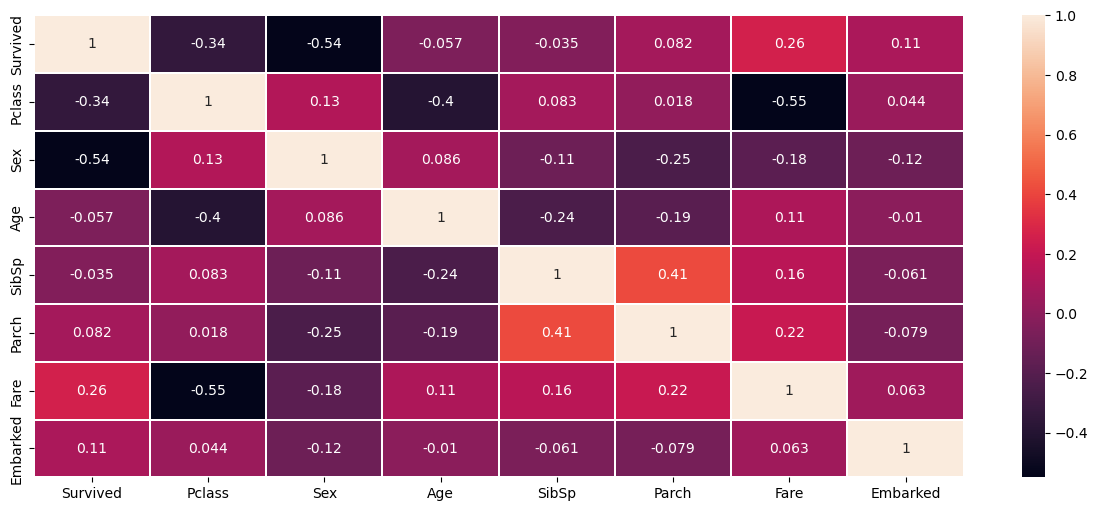

In [159]:
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,linewidths=0.1)

In [162]:
corr['Survived'].sort_values(ascending=False)
#all the values are very much related to the label

Survived    1.000000
Fare        0.257307
Embarked    0.108343
Parch       0.081629
SibSp      -0.035322
Age        -0.056812
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [164]:
#dividing the dataset into feature and label
x=data.drop(columns='Survived')
y=data['Survived']

In [165]:
#apply standardscaler on the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [166]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [167]:
#Now let us check the variance inflation factor of each the column

In [168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled.values,i) for i in range(7)]
vif['columns']=x.columns

In [171]:
vif

,vif,columns
0,1.786394,Pclass
1,1.125971,Sex
2,1.288244,Age
3,1.280553,SibSp
4,1.333075,Parch
5,1.623138,Fare
6,1.051343,Embarked


In [172]:
#so the variance inflation factor seems to be okay for all the remaining columns so we do not need to drop any of them

In [173]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [174]:
#The dataset is fine and is not imbalanced

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [177]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score    

In [178]:
# we will use the logistic regression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8544776119402985 6


In [179]:
#the maximum accuracy is 0.85 and best random state is 6

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=6)

In [182]:
#so we will chekc the accuracy score over different models and we will procedd for hyperparameter tuning and cross validation score for the best mode

In [183]:
rf=RandomForestClassifier()
lr=LogisticRegression()
sv=SVC()
gb=GradientBoostingClassifier()
Ad=AdaBoostClassifier()
bg=BaggingClassifier()

In [184]:
#there are 6 model let us check the accuracy score for  all of them and see which has the best

In [185]:
models=[rf,lr,sv,gb,Ad,bg]

In [186]:
Accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    Accuracy[model]=accuracy_score(y_test,pred)

In [187]:
Accuracy

{RandomForestClassifier(): 0.8097014925373134,
 LogisticRegression(): 0.8544776119402985,
 SVC(): 0.8507462686567164,
 GradientBoostingClassifier(): 0.8283582089552238,
 AdaBoostClassifier(): 0.835820895522388,
 BaggingClassifier(): 0.8208955223880597}

In [191]:
#here we can clearly see that logictic regression has the best accuracy
#now let us verify the model with the cross val score

In [189]:
from sklearn.model_selection import cross_val_score

In [192]:
cv=cross_val_score

In [193]:
mean_accuracy={}
for model in models:
    score=cross_val_score(model,x_scaled,y,cv=5)
    mean_score=score.mean()
    mean_accuracy[model]=mean_score

In [194]:
mean_accuracy

{RandomForestClassifier(): 0.8081162513338773,
 LogisticRegression(): 0.803603038101814,
 SVC(): 0.831648986253217,
 GradientBoostingClassifier(): 0.8249450756386919,
 AdaBoostClassifier(): 0.8081350825434687,
 BaggingClassifier(): 0.806973824618668}

In [195]:
Accuracy

{RandomForestClassifier(): 0.8097014925373134,
 LogisticRegression(): 0.8544776119402985,
 SVC(): 0.8507462686567164,
 GradientBoostingClassifier(): 0.8283582089552238,
 AdaBoostClassifier(): 0.835820895522388,
 BaggingClassifier(): 0.8208955223880597}

In [197]:
#there is very big difference after the cross validation in the logisticregression so we can not move with it 
#the GradientboostingClassifier is performing good in this case so we will proceed for hyperparameter tuning with GradientBoosting

In [198]:
from sklearn.model_selection import GridSearchCV

In [200]:
model=GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 4, 5] 
}

In [202]:
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

In [204]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [206]:
print(grid_search.best_score_,grid_search.best_params_)

0.8201677419354839 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


In [209]:
Gbdt=GradientBoostingClassifier(learning_rate=0.1,max_depth=4,n_estimators=50)

In [210]:
Gbdt.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=50)

In [211]:
pred=Gbdt.predict(x_test)

In [212]:
print(accuracy_score(y_test,pred))

0.8283582089552238


In [213]:
print('the accuracy score of the model is', accuracy_score(y_test,pred))

the accuracy score of the model is 0.8283582089552238


In [215]:
#let us check the roc_auc score of the models

In [216]:
from sklearn.metrics import roc_auc_score

In [217]:
Auc={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    Auc[model]=roc_auc_score(y_test,pred)

In [218]:
Auc

{RandomForestClassifier(): 0.7956101736365859,
 LogisticRegression(): 0.8267913915382734,
 SVC(): 0.801907556859868,
 GradientBoostingClassifier(): 0.7944485204206407,
 AdaBoostClassifier(): 0.80997798972854,
 BaggingClassifier(): 0.7853998532648568}

In [219]:
#The logictic regression had 85% accuracy without any hyper parameter tuning so let us just tune the logistic regression

In [220]:
model=LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [221]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [222]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [223]:
best_param=grid_search.best_estimator_
best_score=grid_search.best_score_

In [224]:
print(best_param,best_score)

LogisticRegression(C=10, penalty='l1', solver='liblinear') 0.7897548387096776


In [227]:
lr=LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [228]:
lr.fit(x_train,y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [229]:
pred=lr.predict(x_test)

In [230]:
print('the accuracy score of the model is', accuracy_score(y_test,pred))

the accuracy score of the model is 0.8544776119402985


In [233]:
#)verall_conclusion-
#so the conclusion is logictic regression has the best acuracy among all the models and it also has best auc_score among all the model
#Altough logistic regression had lower accuracy than gradientboost after Cross validation but it outperformed Gradientboost before and even before hyperparameter tuning